In [704]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import string

dataframes column'names are taken from the `README.md` file in the dataset

In [705]:
# display full numbers separated with spaces instead of scientific notation
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(",", " "))
pd.reset_option('display.float_format')

## Characters

In [706]:
characters_df = pd.read_csv("data/processed_characters.csv")


In [707]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440622 entries, 0 to 440621
Data columns (total 8 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Freebase movie ID                440622 non-null  object 
 1   Movie release date               440622 non-null  int64  
 2   Actor date of birth              335384 non-null  float64
 3   Actor gender                     430966 non-null  object 
 4   Actor ethnicity (Freebase ID)    102839 non-null  object 
 5   Actor name                       439414 non-null  object 
 6   Freebase character/actor map ID  440622 non-null  object 
 7   Freebase actor ID                439822 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 26.9+ MB


In [708]:
characters_df.describe()

Movie release date  Actor date of birth
count       440622.000000        335384.000000
mean          1984.530566          1943.059827
std             25.245842            34.095926
min           1900.000000            19.000000
25%           1969.000000          1923.000000
50%           1994.000000          1948.000000
75%           2005.000000          1966.000000
max           2016.000000          9900.000000

In [709]:
print("percentage of NaNs per columns")
characters_df.isna().mean() * 100

percentage of NaNs per columns


Freebase movie ID                   0.000000
Movie release date                  0.000000
Actor date of birth                23.883964
Actor gender                        2.191448
Actor ethnicity (Freebase ID)      76.660494
Actor name                          0.274158
Freebase character/actor map ID     0.000000
Freebase actor ID                   0.181562
dtype: float64

In [710]:
characters_df.sample(10)

Freebase movie ID  Movie release date  Actor date of birth  \
118388        /m/0462h5c                2009               1983.0   
22326         /m/02rbsv4                1937               1904.0   
386678        /m/03mb2j7                1996               1976.0   
380279        /m/05h4pv4                1939               1901.0   
433529         /m/05lz58                1991               1962.0   
128979         /m/09scmx                1997               1972.0   
91723         /m/0gjf2pl                1969               1938.0   
51799         /m/0c3znhx                2009               1967.0   
44509         /m/05zlr_x                1934               1904.0   
415094        /m/03hlj1v                1970               1925.0   

       Actor gender Actor ethnicity (Freebase ID)     Actor name  \
118388            F                           NaN    Emily Blunt   
22326             F                           NaN    Anna Neagle   
386678            F                     /m/02sch9   Simran Bagga   
380279            M                           NaN   James Raglan   
433529            M                           NaN    Ben Browder   
128979            M                           NaN    Scott Foley   
91723             M                           NaN   Serge Nubret   
51799             M                    /m/0dryh9k    Arbaaz Khan   
44509             F                           NaN  Helene Berthe   
415094            F                           NaN  Betty Beckers   

       Freebase character/actor map ID Freebase actor ID  
118388                      /m/04q4gxs         /m/04205z  
22326                       /m/02vdbw9         /m/01py4j  
386678                      /m/0cgnl1h         /m/04cmrt  
380279                      /m/0n54mlv        /m/0ddcz7q  
433529                      /m/0h5j0rh         /m/01cwk9  
128979                      /m/0kpvt8q         /m/052sl3  
91723                       /m/0gw231g         /m/09407h  
51799                       /m/0cskgz5         /m/05wd82  
44509                       /m/0kcgr_0        /m/0kcgr_b  
415094                      /m/0b_ncfr        /m/0b_ncfp

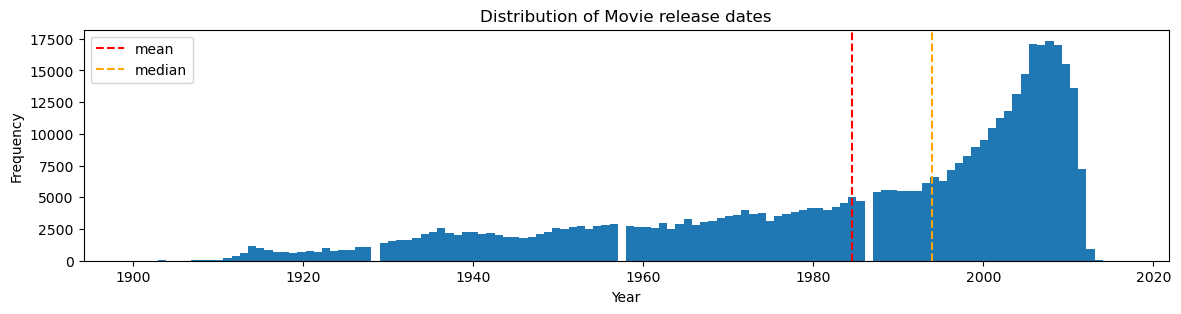

In [711]:
movie_dates = characters_df['Movie release date'].astype(int) #pd.to_datetime(characters_df['Movie release date'], errors='coerce').dt.year
plt.figure(figsize=(14,3))
plt.hist(movie_dates, bins=2020-1900)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie release dates')
plt.axvline(movie_dates.mean(), linestyle="--", color="red", label="mean")
plt.axvline(movie_dates.median(), color="orange", label="median", linestyle="--")
plt.legend()
plt.show()

<Axes: title={'center': 'Actor age at movie release'}, xlabel='Age', ylabel='Frequency'>

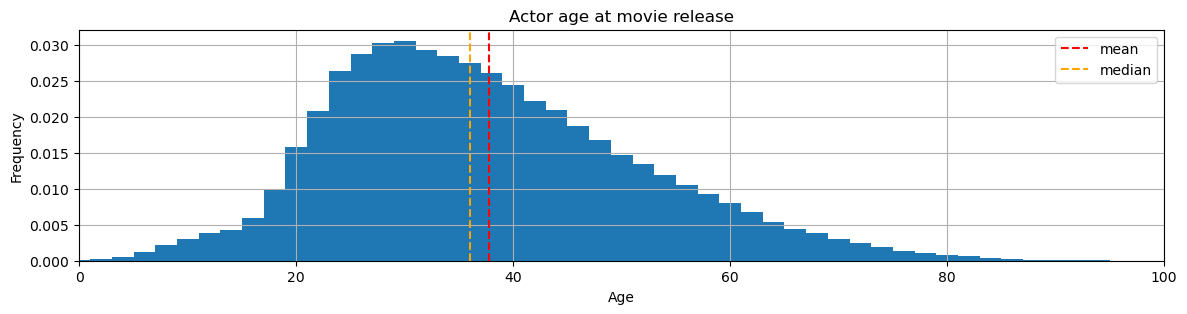

In [712]:
characters_df_noproccessed = pd.read_csv("data/character.metadata.tsv", delimiter="\t", header=None)
characters_df_noproccessed.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

plt.figure(figsize=(14,3))
plt.title("Actor age at movie release")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.axvline(characters_df_noproccessed["Actor age at movie release"].mean(), linestyle="--", color="red", label="mean")
plt.axvline(characters_df_noproccessed["Actor age at movie release"].median(), color="orange", label="median", linestyle="--")
plt.legend()
characters_df_noproccessed["Actor age at movie release"].hist(bins=4000, density=True)

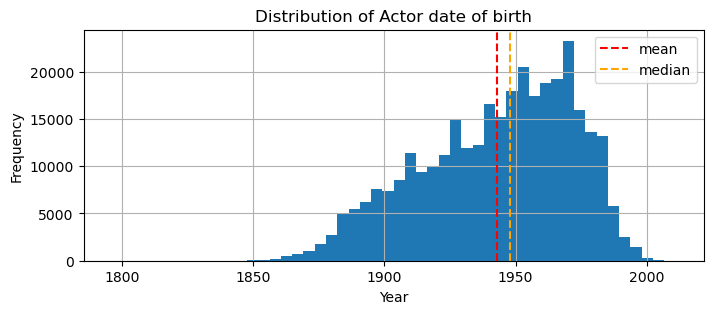

In [713]:

actor_dates = pd.to_datetime(characters_df_noproccessed['Actor date of birth'], errors='coerce').dt.year

plt.figure(figsize=(8,3))
plt.hist(actor_dates, bins=50)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Actor date of birth')

plt.axvline(actor_dates.mean(), linestyle="--", color="red", label="mean")
plt.axvline(actor_dates.median(), color="orange", label="median", linestyle="--")
plt.legend()
plt.grid()

plt.show()


<Axes: xlabel='Actor gender'>

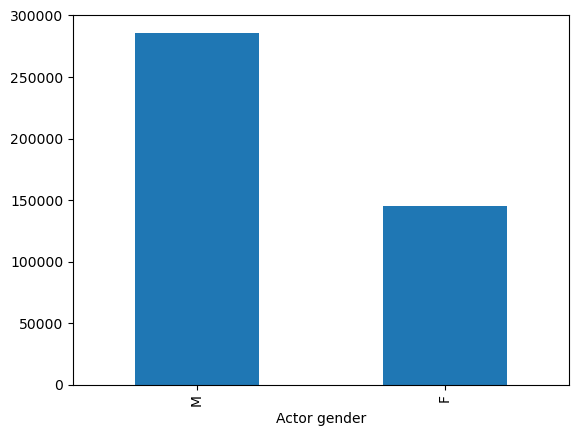

In [714]:
characters_df["Actor gender"].value_counts().plot(kind="bar")

# Movies

## Genres

In [715]:
from collections import Counter

In [716]:
periods_map = {
    "The Belle Époque (1900-1914)": {"start_year": 1900, "end_year": 1914},
    "World War I (1914-1918)": {"start_year": 1914, "end_year": 1919},
    "The Roaring Twenties (1920-1929)": {"start_year": 1920, "end_year": 1929},
    "The Great Depression (1929-1939)": {"start_year": 1929, "end_year": 1939},
    "World War II (1939-1945)": {"start_year": 1939, "end_year": 1946},
    "The Cold War and McCarthyism (1947-1991)": {"start_year": 1947, "end_year": 1991},
    "The Civil Rights and Social Equality Struggles (1950s-1970s)": {"start_year": 1950, "end_year": 1970},
    "The Reagan Years and the Rise of Neoliberalism (1980s)": {"start_year": 1980, "end_year": 1989},
    "The Post-Cold War and the New World Order (1991-2001)": {"start_year": 1991, "end_year": 2001},
    "The 9/11 Attacks and the War on Terrorism (2001-present)": {"start_year": 2001, "end_year": 2024},
}

def map_year_to_periods(year, periods):
    matching_periods = []
    for period, years in periods.items():
        if years['start_year'] <= year <= years['end_year']:
            matching_periods.append(period)
    if matching_periods:
        return matching_periods
    else:
        return ["Year not in any defined period"]
    
# Sort the periods based on their start year
sorted_periods = sorted(periods_map.items(), key=lambda x: x[1]['start_year'])
# Create a mapping from period name to its position in the timeline
period_order_map_dict = {period[0]: idx for idx, period in enumerate(sorted_periods)}

periods_events_map = {
    "The Belle Époque (1900-1914)": [
        "third_Great_Awakening", 
        "economic_prosperity", 
        "segregation"
    ],
    "World War I (1914-1918)": [
        "segregation", 
        "WWI"
    ],
    "The Roaring Twenties (1920-1929)": [
        "economic_euphoria", 
        "industrial_expansion", 
        "cultural_change", 
        "rise_of_women's_rights", 
        "stock_market_boom", 
        "prohibition"
    ],
    "The Great Depression (1929-1939)": [
        "1929_stock_market_crash", 
        "mass_unemployment", 
        "New_Deal_reforms"
    ],
    "World War II (1939-1945)": [
        "military_production_recovery", 
        "U.S._contribution_to_Allies", 
        "new_technologies", 
        "United_Nations", 
        "WWII"
    ],
    "The Cold War and McCarthyism (1947-1991)": [
        "capitalist_vs_communist_blocs", 
        "internal_political_repression", 
        "Korean_War", 
        "Cuban_Missile_Crisis", 
        "Vietnam_War", 
        "space_race"
    ],
    "The Civil Rights and Social Equality Struggles (1950s-1970s)": [
        "civil_rights_movements", 
        "Martin_Luther_King_Jr.", 
        "Civil_Rights_Act", 
        "Voting_Rights_Act", 
        "women's_and_LGBTQ+_rights"
    ],
    "The Reagan Years and the Rise of Neoliberalism (1980s)": [
        "conservative_shift", 
        "deregulation", 
        "tax_cuts", 
        "War_on_drugs", 
        "arms_race", 
        "new_technologies"
    ],
    "The Post-Cold War and the New World Order (1991-2001)": [
        "fall_of_the_Soviet_Union", 
        "technological_advancements", 
        "Gulf_War", 
        "internet_development", 
        "1990s_economic_boom"
    ],
    "The 9/11 Attacks and the War on Terrorism (2001-present)": [
        "september_11th_attacks", 
        "War_on_Terror", 
        "Patriot_Act", 
        "Iraq_War", 
        "2008_financial_crisis", 
        "geopolitical_tensions"
    ]
}

In [717]:
# Load data
processed_movies_df = pd.read_csv("data/processed_movies.csv")
movies_df = processed_movies_df[['Movie name', 'Movie release date', 'Movie genres']]

Filter the movies dataset. We only keep the movies released after 1900 and from the USA.

In [718]:
movies_df.loc[:, 'Periods'] = movies_df['Movie release date'].apply(map_year_to_periods, periods=periods_map)
movies_df['Periods'].head(10)

/var/folders/tj/z0dp280955b2cclgs13c8ngm0000gn/T/ipykernel_34938/3430741218.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    [The Post-Cold War and the New World Order (19...
1    [The Post-Cold War and the New World Order (19...
2                       [The Belle Époque (1900-1914)]
3                   [The Great Depression (1929-1939)]
4                   [The Great Depression (1929-1939)]
5    [The Post-Cold War and the New World Order (19...
6    [The Cold War and McCarthyism (1947-1991), The...
7    [The Post-Cold War and the New World Order (19...
8                   [The Great Depression (1929-1939)]
9    [The Post-Cold War and the New World Order (19...
Name: Periods, dtype: object

In [719]:
movies_df_copy = movies_df.copy()

# Casefolding all the strings of column "Movie genres" the Data Frame
movies_df_copy['Movie genres'] = movies_df_copy['Movie genres'].apply(lambda x: x.casefold() if isinstance(x, str) else x)

# Transform string into a list of strings (word = genre)
def clean_genres(x):
    # If the value is a string (which contains the genres), clean it
    if isinstance(x, str):
        str_to_list = [genre.strip("'") for genre in x.strip("[]").split(", ")]
        #str_to_list = [genre for genre in str_to_list if genre not in unwanted_genres]
        return str_to_list if str_to_list else None
    # If it's already a list, return it as is
    elif isinstance(x, list):
        return x
    else:
        genres = []
    # Remove the row if the list is empty
    return genres if genres else None


# Clean the genres
movies_df_copy['Movie genres'] = movies_df_copy['Movie genres'].apply(clean_genres)

movies_df_copy['Movie genres']

0        [thriller, science fiction, horror, adventure,...
1         [mystery, biographical film, drama, crime drama]
2        [short film, silent film, indie, black-and-whi...
3                       [musical, comedy, black-and-white]
4                                 [drama, black-and-white]
                               ...                        
33197                          [parody, americana, comedy]
33198    [thriller, erotic thriller, psychological thri...
33199                 [comedy film, romance film, musical]
33200                                              [drama]
33201                                     [satire, comedy]
Name: Movie genres, Length: 33202, dtype: object

In [720]:
# This cell is just useful to rank the occurences of the genres and map the top 50 to one of the 10 themes

unique_genres = [genre for sublist in movies_df_copy['Movie genres'] for genre in sublist]

themes_counts_years = Counter(unique_genres)

# Sort the Counter dictionary by value in descending order
sorted_genre_counts = dict(sorted(themes_counts_years.items(), key=lambda item: item[1], reverse=True))

print(sorted_genre_counts)

{'drama': 12995, 'comedy': 9472, 'black-and-white': 6018, 'indie': 5413, 'thriller': 4851, 'short film': 4688, 'action': 4446, 'romance film': 4439, 'crime fiction': 3571, 'silent film': 3240, 'action/adventure': 3077, 'adventure': 2986, 'horror': 2965, 'documentary': 2702, 'family film': 2626, 'science fiction': 1885, 'western': 1824, 'mystery': 1816, 'romantic comedy': 1791, 'musical': 1678, 'animation': 1632, 'crime thriller': 1459, 'fantasy': 1422, 'romantic drama': 1407, 'war film': 1198, 'film adaptation': 1131, 'comedy-drama': 1066, 'period piece': 1037, 'biography': 959, 'comedy film': 940, 'psychological thriller': 931, 'sports': 806, 'teen': 789, 'television movie': 779, 'parody': 754, '"children\'s/family"': 733, 'black comedy': 667, 'family drama': 633, 'biographical film': 608, 'cult': 605, 'slasher': 598, 'suspense': 597, 'lgbt': 597, 'coming of age': 588, 'music': 573, 'film noir': 541, 'slapstick': 529, 'culture & society': 509, 'melodrama': 463, 'history': 454, 'supern

In [721]:
# Clearer to put it this way: theme and its corresponding genres
theme_mapping = {
    'Action/Adventure': ['action', 'thriller', 'adventure', 'action/adventure'],
    'Comedy': ['comedy', 'romantic comedy', 'black comedy', 'slapstick', 'comedy-drama'],
    'Drama': ['drama', 'family drama', 'melodrama', 'crime drama', 'political drama'],
    'Romance': ['romance film', 'romantic comedy', 'romantic drama', 'romantic fantasy'],
    'Crime': ['crime fiction', 'crime thriller', 'gangster film', 'crime drama'],
    'Horror': ['horror', 'slasher', 'psychological thriller', 'zombie film', 'horror comedy'],
    'Science Fiction': ['science fiction', 'fantasy', 'superhero movie', 'sci-fi horror'],
    'Historical': ['period piece', 'historical drama', 'biography'],
    'War': ['war film', 'military drama', 'combat film', 'anti-war film'],
    'Animation': ['animation', 'animated cartoon', 'computer animation', 'animated musical'],
    'Documentary': ['documentary', 'docudrama', 'rockumentary', 'concert film'], 
    'Short': ['short film'],
    'Black-and-White': ['black-and-white'],
    'Silent': ['silent film'],
    'Independent': ['indie'],
    'Musical': ['musical', 'musical drama', 'musical comedy'],
    'LGBT': ['lgbt', 'gay', 'gay themed'],
    'Other': []
}


# Inverting the theme_mapping to map genres to themes
genre_to_theme_mapping = {
    genre: theme
    for theme, genres in theme_mapping.items()
    for genre in genres
}

# Function to map genres to themes
def map_genres_to_themes(genres, mapping):
    if isinstance(genres, list):
        themes = set()
        for genre in genres:
            if genre in mapping:
                themes.add(mapping[genre])
            else:
                themes.add('Other')
        return themes
    elif isinstance(genres, str):
        if genres in mapping:
            return {mapping[genres]}
        else:
            return {'Other'}
    return None

movies_df_copy['Themes'] = movies_df_copy['Movie genres'].apply(lambda genres: map_genres_to_themes(genres, genre_to_theme_mapping))

# Drop rows where Themes is NaN or empty
movies_df_copy = movies_df_copy.dropna(subset=['Themes'])

movies_df_copy['Themes'].head()

0    {Action/Adventure, Horror, Science Fiction, Ot...
1                                {Drama, Crime, Other}
2    {Black-and-White, Short, Independent, Comedy, ...
3                   {Comedy, Musical, Black-and-White}
4                             {Drama, Black-and-White}
Name: Themes, dtype: object

In [722]:
# Prepare the data for the plots
movies_df_copy_exploded = movies_df_copy.explode('Themes')
themes = list(theme_mapping.keys())

In [723]:
# Define a color palette for the themes so they are assigned the same color for all plots

# Define a custom color palette for the 15 themes
custom_colors = [
    "#e41a1c",  # Red
    "#377eb8",  # Blue
    "#4daf4a",  # Green
    "#ff7f00",  # Orange
    "#984ea3",  # Purple
    "#ff7f00",  # Orange
    "#ffff33",  # Yellow
    "#a65628",  # Brown
    "#000000",  # Black
    "#999999",  # Gray
    "#dede00",  # Lime Yellow
    "#8dd3c7",  # Light teal
    "#fdb462",  # Light orange
    "#b3b3cc",  # Soft gray-blue
    "#c2c2f0",  # Lavender
    "#ff69b4",  # Hot Pink
    "#8a2be2",  # Blue Violet
    "#00ced1",  # Dark Turquoise
    "#a0522d"   # Sienna
]

# Map themes to distinct colors
theme_colors = {theme: color for theme, color in zip(themes, custom_colors)}

#### Themes according to Years

In [724]:
themes_years_counts = (
    movies_df_copy_exploded
    .groupby(['Themes', 'Movie release date'])
    .size()
    .reset_index(name='count')
)

# Pivot the table so that each theme has its own column
theme_years_counts_pivot = themes_years_counts.pivot(index='Movie release date', columns='Themes', values='count')
theme_years_counts_pivot = theme_years_counts_pivot.fillna(0)
# Normalize the counts
normalized_theme_years_counts = theme_years_counts_pivot.div(theme_years_counts_pivot.sum(axis=1), axis=0)

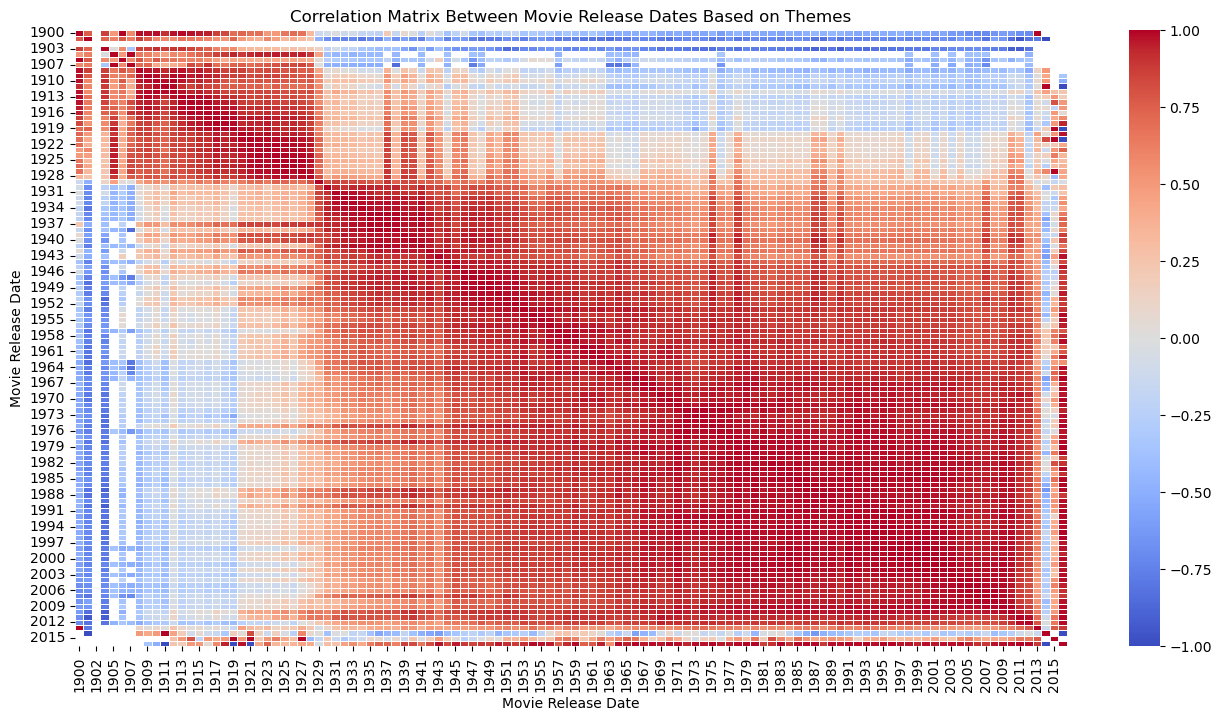

In [725]:
# Pivot the table to get Movie release date on both axes
release_date_themes_pivot = themes_years_counts.pivot_table(index='Themes', columns='Movie release date', values='count', aggfunc='sum')

# Calculate the correlation matrix between Movie release date based on the themes
correlation_matrix = release_date_themes_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Between Movie Release Dates Based on Themes')
plt.xlabel('Movie Release Date')
plt.ylabel('Movie Release Date')
plt.show()


In [726]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in themes:
    if theme in theme_years_counts_pivot.columns:
        fig.add_trace(go.Scatter(
            x=theme_years_counts_pivot.index,  # x-axis is the release year
            y=theme_years_counts_pivot[theme],  # y-axis is the number of movies for each theme
            mode='lines',  # Use lines for the plot
            name=theme,  # Set the theme name for the legend
            line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
            hovertemplate='Year: %{x}<br>Number of Movies: %{y}<br>'  # Custom hover text
        ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Years',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title='Themes',
    height=1000,
    width=1100,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
)

# Show the interactive plot
fig.show()

In [727]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

hover_text = theme_years_counts_pivot.apply(lambda row: '<br>'.join([f'{theme}: {count}' for theme, count in row.items()]), axis=1)

# Add a single trace with customized hover text
for theme in theme_years_counts_pivot.columns:
    hover_text = [
        f'<b>Year: {year}</b><br>' + '<br>'.join([f'{t}: {theme_years_counts_pivot[t].loc[year]}' for t in theme_years_counts_pivot.columns])
        for year in theme_years_counts_pivot.index
    ]
    fig.add_trace(go.Scatter(
        x=theme_years_counts_pivot.index,  # x-axis is the release year
        y=theme_years_counts_pivot[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        mode='lines',
        line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
        hovertext=hover_text,
        hoverinfo='text'
    ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Years',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title='Themes',
    height=600,
    width=1000,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
    template='plotly_dark'
)

# Show the interactive plot
fig.show()


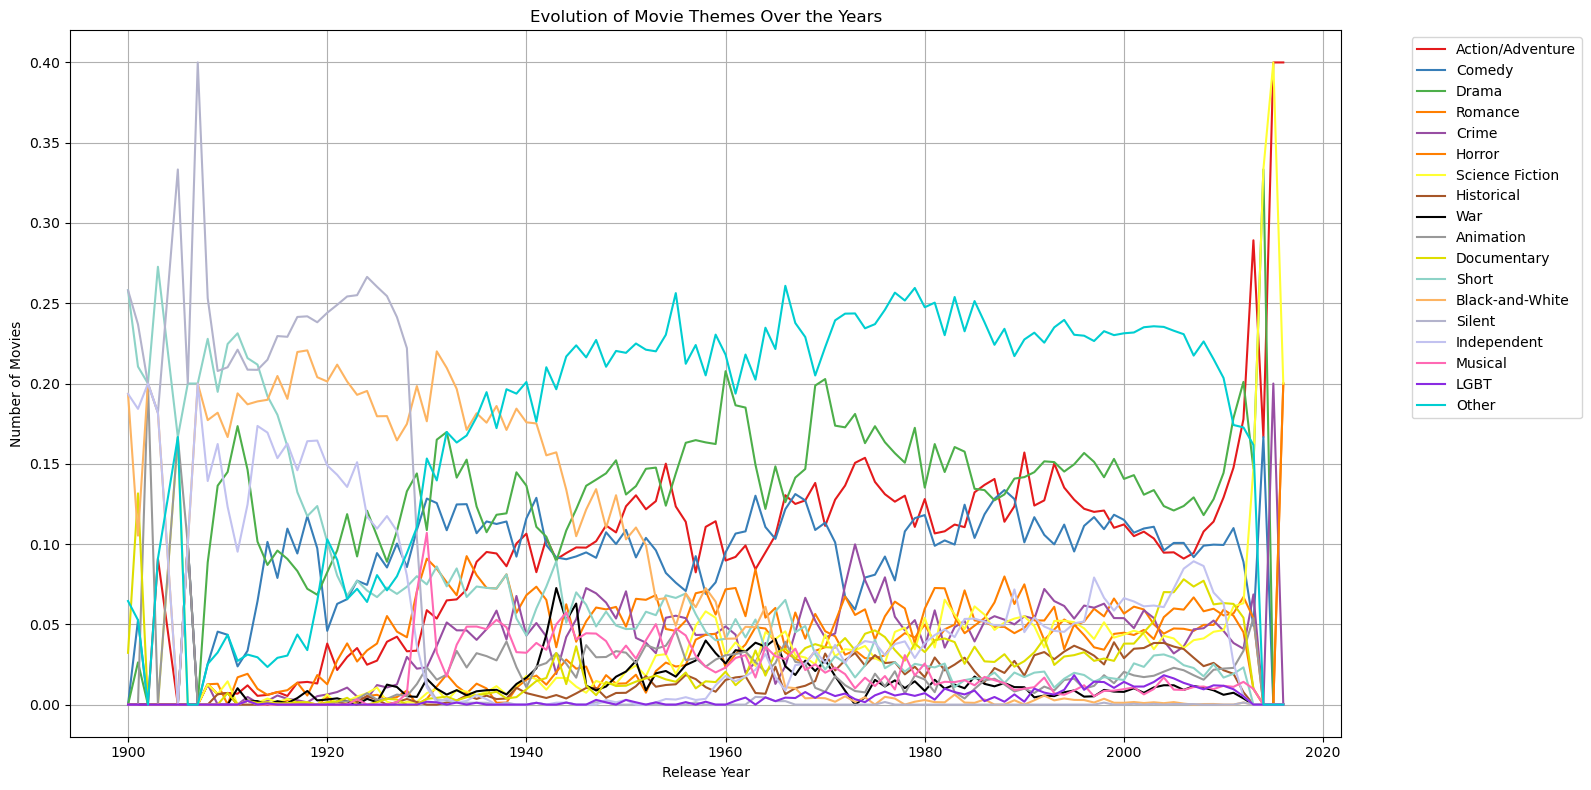

In [728]:
# Plot the number of movies in each genre for each year
plt.figure(figsize=(16, 8))

for theme in themes:
    if theme in normalized_theme_years_counts.columns:
        plt.plot(normalized_theme_years_counts.index, normalized_theme_years_counts[theme], label=theme, color=theme_colors[theme])

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Evolution of Movie Themes Over the Years')
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()
plt.tight_layout()
plt.show()

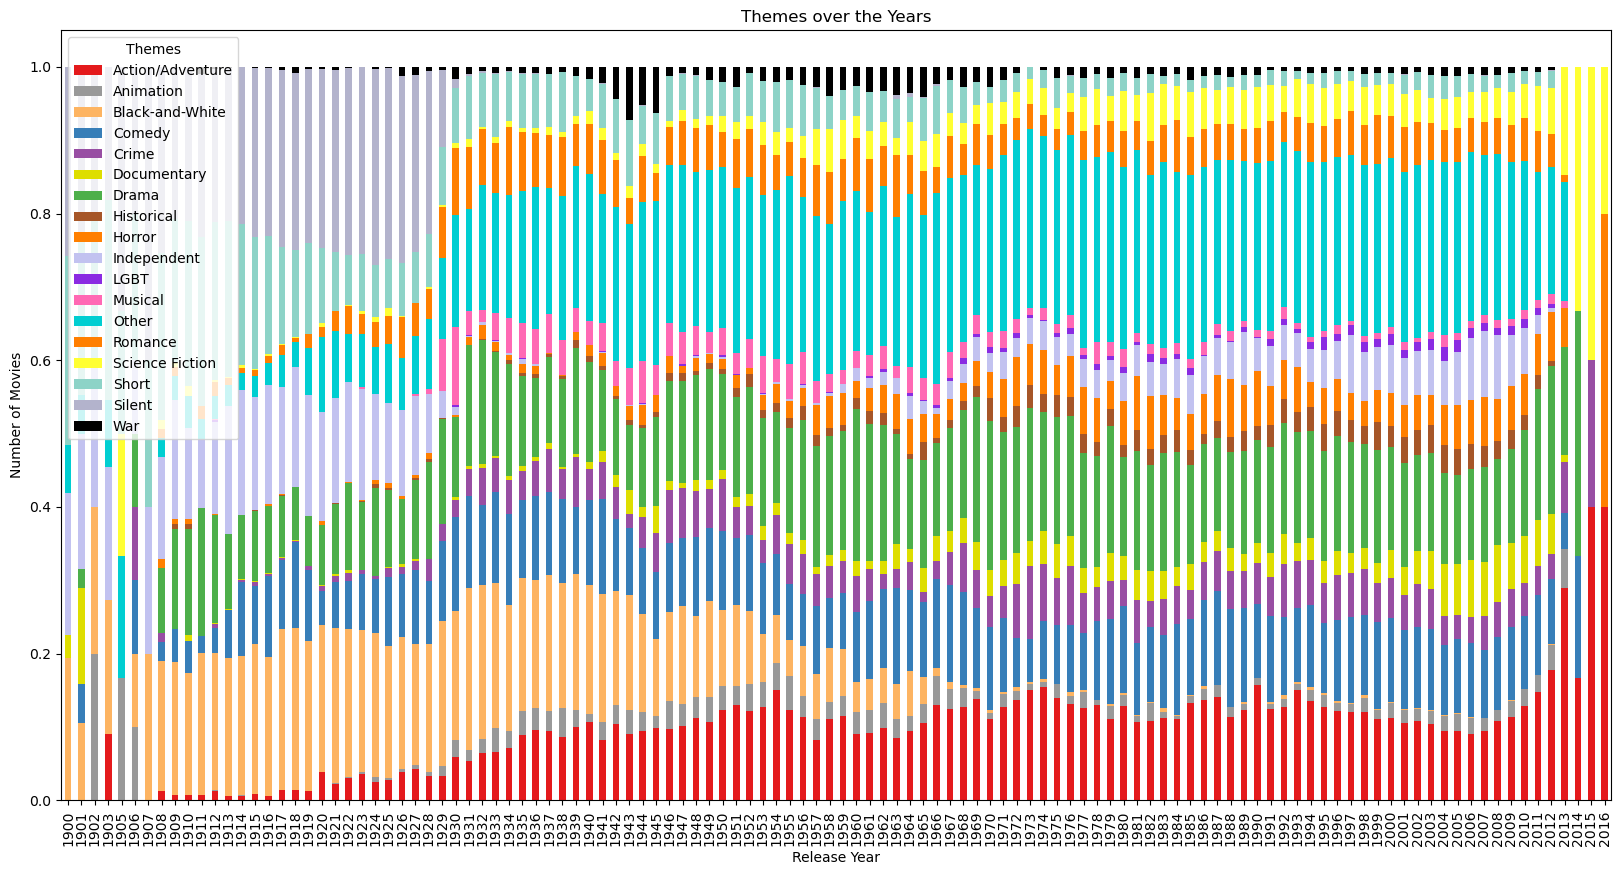

In [729]:
normalized_theme_years_counts.plot(kind='bar', stacked=True, figsize=(20, 10), color=[theme_colors[theme] for theme in theme_years_counts_pivot.columns])
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Themes over the Years')
plt.legend(title='Themes')
plt.xticks(rotation=90)
plt.show()

In [730]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in theme_years_counts_pivot.columns:
    fig.add_trace(go.Bar(
        x=theme_years_counts_pivot.index,  # x-axis is the release year
        y=normalized_theme_years_counts[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        marker_color=theme_colors.get(theme, 'gray'),  # Use color mapping for each theme
        hovertemplate='Year: %{x}<br>' + 'Theme proportion: %{y}<br>',  # Custom hover text
    ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Themes over the Years',
        'x': 0.5,  # center the title
        'xanchor': 'center'  # anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    barmode='stack',
    xaxis_tickangle=270,
    legend_title='Themes',
    height=1000,
    width=1200
)

# Show the interactive plot
fig.show()


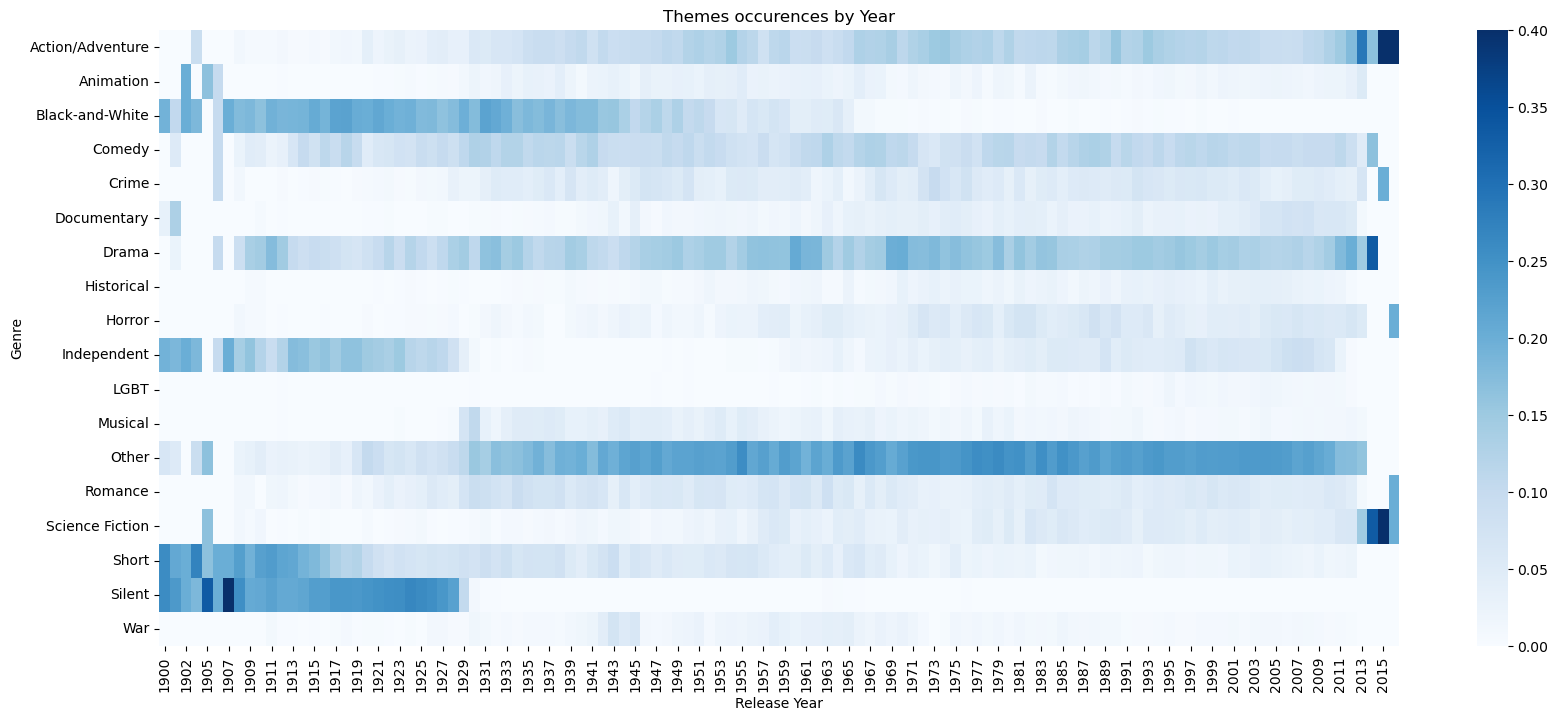

In [731]:
# Plot a heatmap showing top 3 genre appearances across years
plt.figure(figsize=(20, 8))
sns.heatmap(normalized_theme_years_counts.T, cmap="Blues")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.title("Themes occurences by Year")
plt.show()

#### Themes according to Periods

In [732]:
movies_df_copy_exploded = movies_df_copy_exploded.explode('Periods')

themes_counts_periods = (
    movies_df_copy_exploded
    .groupby(['Themes', 'Periods'])
    .size()
    .reset_index(name='count')
)

# Pivot the table so that each theme has its own column
theme_periods_counts_pivot = themes_counts_periods.pivot(index='Periods', columns='Themes', values='count')

sorted_periods = sorted(period_order_map_dict.keys(), key=lambda x: period_order_map_dict[x])

# Reorder the index of the pivot table based on the sorted periods
theme_periods_counts_pivot = theme_periods_counts_pivot.loc[sorted_periods]
theme_periods_counts_pivot = theme_periods_counts_pivot.fillna(0)

# Normalize the counts row-wise to calculate percentages
normalized_theme_periods_counts = theme_periods_counts_pivot.div(theme_periods_counts_pivot.sum(axis=1), axis=0)

# Display the percentage pivot table
normalized_theme_periods_counts

Themes                                              Action/Adventure  \
Periods                                                                
The Belle Époque (1900-1914)                                0.007005   
World War I (1914-1918)                                     0.009103   
The Roaring Twenties (1920-1929)                            0.032784   
The Great Depression (1929-1939)                            0.075992   
World War II (1939-1945)                                    0.096676   
The Cold War and McCarthyism (1947-1991)                    0.122081   
The Civil Rights and Social Equality Struggles ...          0.115307   
The Reagan Years and the Rise of Neoliberalism ...          0.122513   
The Post-Cold War and the New World Order (1991...          0.121380   
The 9/11 Attacks and the War on Terrorism (2001...          0.109067   

Themes                                              Animation  \
Periods                                                         
The Belle Époque (1900-1914)                         0.001459   
World War I (1914-1918)                              0.000331   
The Roaring Twenties (1920-1929)                     0.004634   
The Great Depression (1929-1939)                     0.025835   
World War II (1939-1945)                             0.024245   
The Cold War and McCarthyism (1947-1991)             0.019889   
The Civil Rights and Social Equality Struggles ...   0.028980   
The Reagan Years and the Rise of Neoliberalism ...   0.012100   
The Post-Cold War and the New World Order (1991...   0.014261   
The 9/11 Attacks and the War on Terrorism (2001...   0.020448   

Themes                                              Black-and-White    Comedy  \
Periods                                                                         
The Belle Époque (1900-1914)                               0.186515  0.067717   
World War I (1914-1918)                                    0.202416  0.098146   
The Roaring Twenties (1920-1929)                           0.189324  0.080844   
The Great Depression (1929-1939)                           0.187711  0.114046   
World War II (1939-1945)                                   0.153095  0.101250   
The Cold War and McCarthyism (1947-1991)                   0.031089  0.103245   
The Civil Rights and Social Equality Struggles ...         0.054799  0.099499   
The Reagan Years and the Rise of Neoliberalism ...         0.001862  0.117627   
The Post-Cold War and the New World Order (1991...         0.002513  0.110197   
The 9/11 Attacks and the War on Terrorism (2001...         0.000709  0.100522   

Themes                                                 Crime  Documentary  \
Periods                                                                     
The Belle Époque (1900-1914)                        0.002335     0.003211   
World War I (1914-1918)                             0.003641     0.000993   
The Roaring Twenties (1920-1929)                    0.012187     0.001545   
The Great Depression (1929-1939)                    0.045037     0.004655   
World War II (1939-1945)                            0.048185     0.017078   
The Cold War and McCarthyism (1947-1991)            0.051113     0.026914   
The Civil Rights and Social Equality Struggles ...  0.043558     0.020813   
The Reagan Years and the Rise of Neoliberalism ...  0.048400     0.031414   
The Post-Cold War and the New World Order (1991...  0.057925     0.031978   
The 9/11 Attacks and the War on Terrorism (2001...  0.045000     0.064067   

Themes                                                 Drama  Historical  \
Periods                                                                    
The Belle Époque (1900-1914)                        0.107998    0.000584   
World War I (1914-1918)                             0.085237    0.000497   
The Roaring Twenties (1920-1929)                    0.108823    0.001888   
The Great Depression (1929-1939)                    0.135808    0.003724   


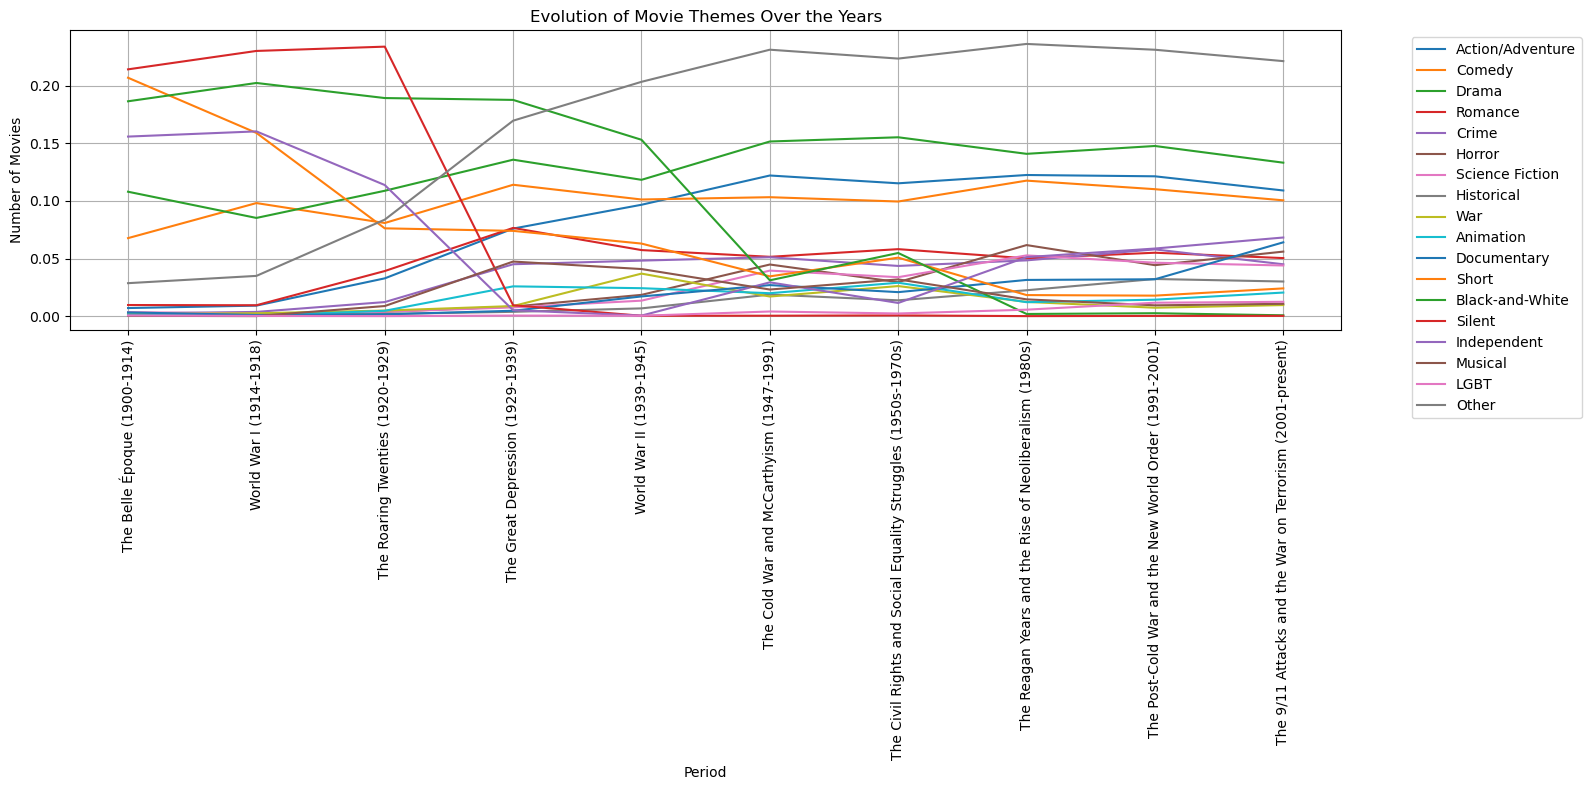

In [733]:
# Plot the number of movies in each genre for each period
plt.figure(figsize=(16, 8))

for theme in themes:
    if theme in normalized_theme_periods_counts.columns:
        plt.plot(normalized_theme_periods_counts.index, normalized_theme_periods_counts[theme], label=theme)

plt.xlabel('Period')
plt.ylabel('Number of Movies')
plt.title('Evolution of Movie Themes Over the Years')
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [734]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in themes:
    if theme in theme_periods_counts_pivot.columns:
        fig.add_trace(go.Scatter(
            x=theme_periods_counts_pivot.index,  # x-axis is the release year
            y=theme_periods_counts_pivot[theme],  # y-axis is the number of movies for each theme
            mode='lines',  # Use lines for the plot
            name=theme,  # Set the theme name for the legend
            line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
            hovertemplate='Period: %{x}<br>Number of Movies: %{y}<br>'  # Custom hover text
        ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Periods',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Period',
    yaxis_title='Number of Movies',
    legend_title='Themes',
    height=1000,
    width=1100,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
)

# Show the interactive plot
fig.show()

In [735]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

hover_text = theme_periods_counts_pivot.apply(lambda row: '<br>'.join([f'{theme}: {count}' for theme, count in row.items()]), axis=1)

# Add a single trace with customized hover text
for theme in theme_periods_counts_pivot.columns:
    hover_text = [
        f'<b>Year: {year}</b><br>' + '<br>'.join([f'{t}: {theme_periods_counts_pivot[t].loc[year]}' for t in theme_periods_counts_pivot.columns])
        for year in theme_periods_counts_pivot.index
    ]
    fig.add_trace(go.Scatter(
        x=theme_periods_counts_pivot.index,  # x-axis is the release year
        y=theme_periods_counts_pivot[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        mode='lines',
        line=dict(color=theme_colors.get(theme, 'gray')),  # Use color mapping for each theme
        hovertext=hover_text,
        hoverinfo='text'
    ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Evolution of Movie Themes Over the Years',
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    legend_title='Themes',
    height=1000,
    width=1000,
    xaxis_tickangle=270,  # Rotate x-axis labels for better visibility
    template='plotly_dark'
)

# Show the interactive plot
fig.show()

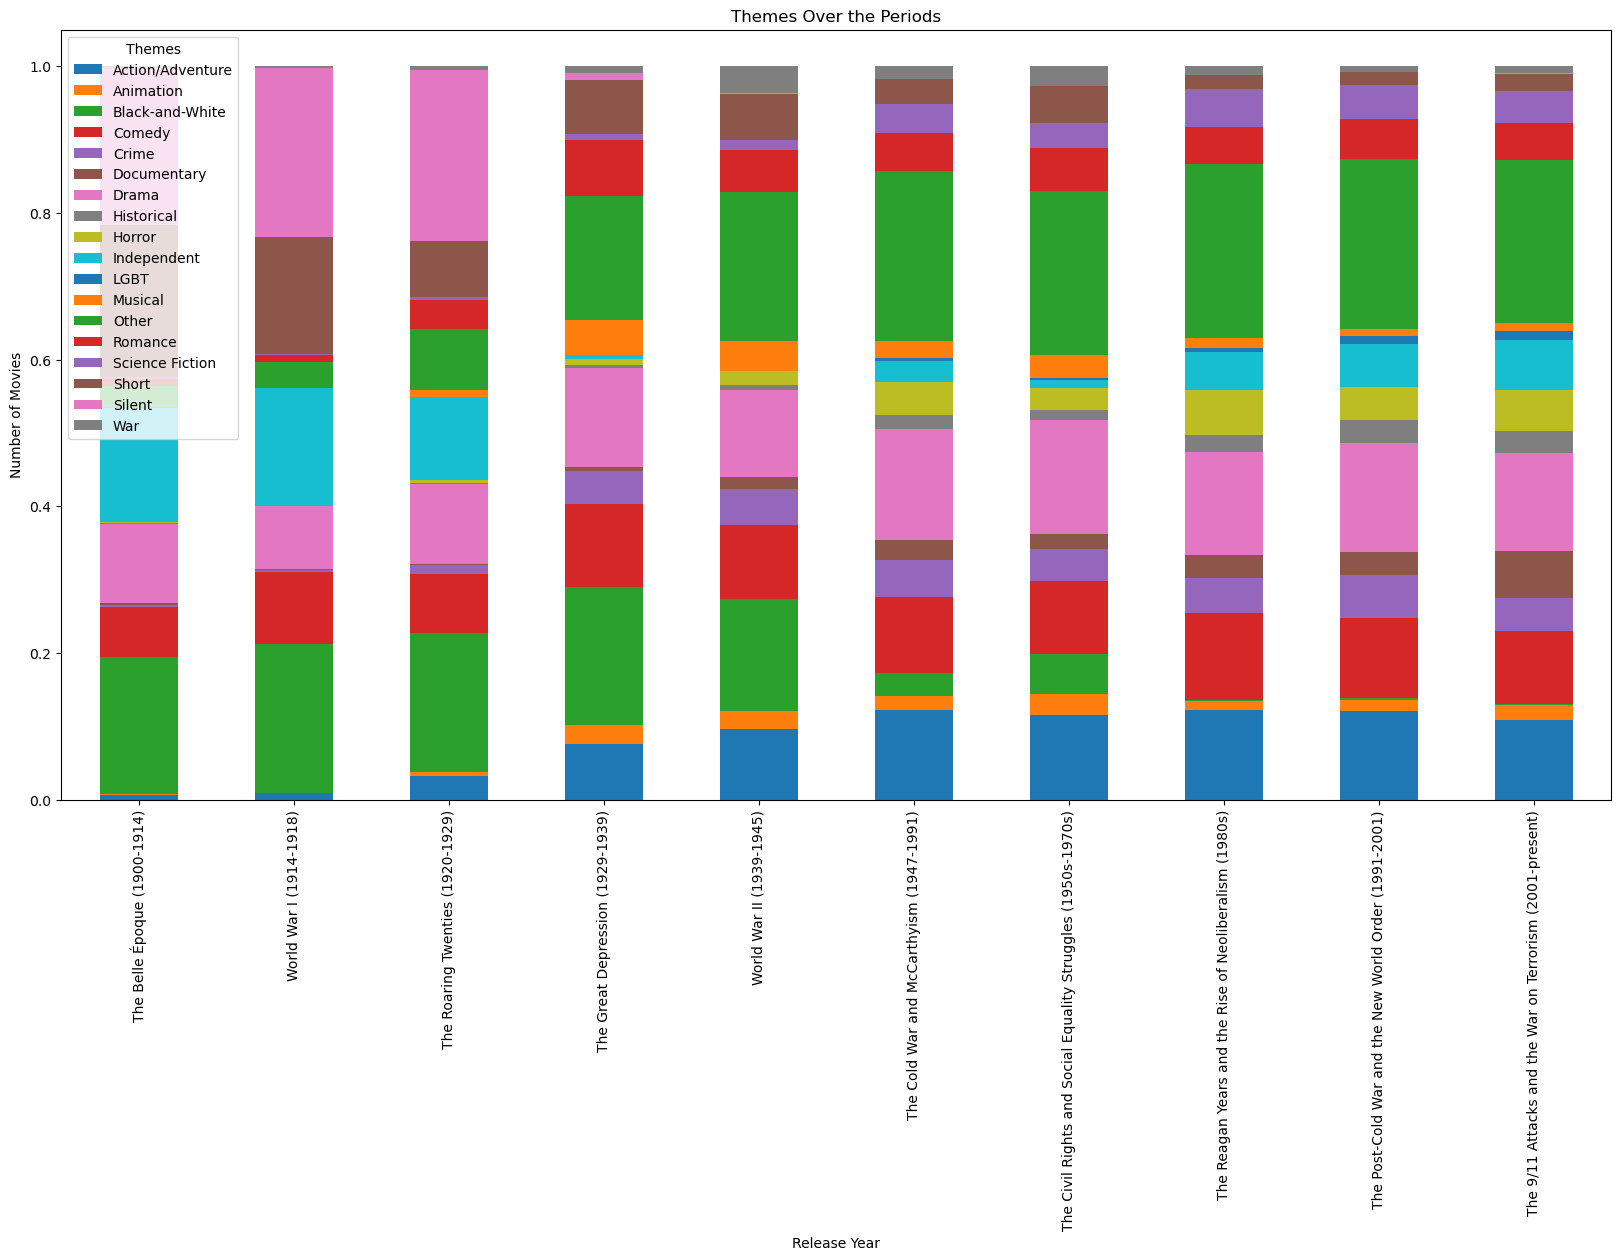

In [736]:
normalized_theme_periods_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Themes Over the Periods')
plt.legend(title='Themes')
plt.xticks(rotation=90)
plt.show()

In [737]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Add each theme as a trace
for theme in theme_years_counts_pivot.columns:
    fig.add_trace(go.Bar(
        x=theme_periods_counts_pivot.index,  # x-axis is the release year
        y=normalized_theme_periods_counts[theme],  # y-axis is the number of movies for each theme
        name=theme,  # Set the theme name for the legend
        marker_color=theme_colors.get(theme, 'gray'),  # Use color mapping for each theme
        hovertemplate='Period: %{x}<br>' + 'Theme proportion: %{y}<br>',  # Custom hover text
    ))

# Update layout for the plot
fig.update_layout(
    title={
        'text': 'Themes over the Years',
        'x': 0.5,  # center the title
        'xanchor': 'center'  # anchor the title in the center
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Movies',
    barmode='stack',
    xaxis_tickangle=270,
    legend_title='Themes',
    height=1000,
    width=1000
)

# Show the interactive plot
fig.show()

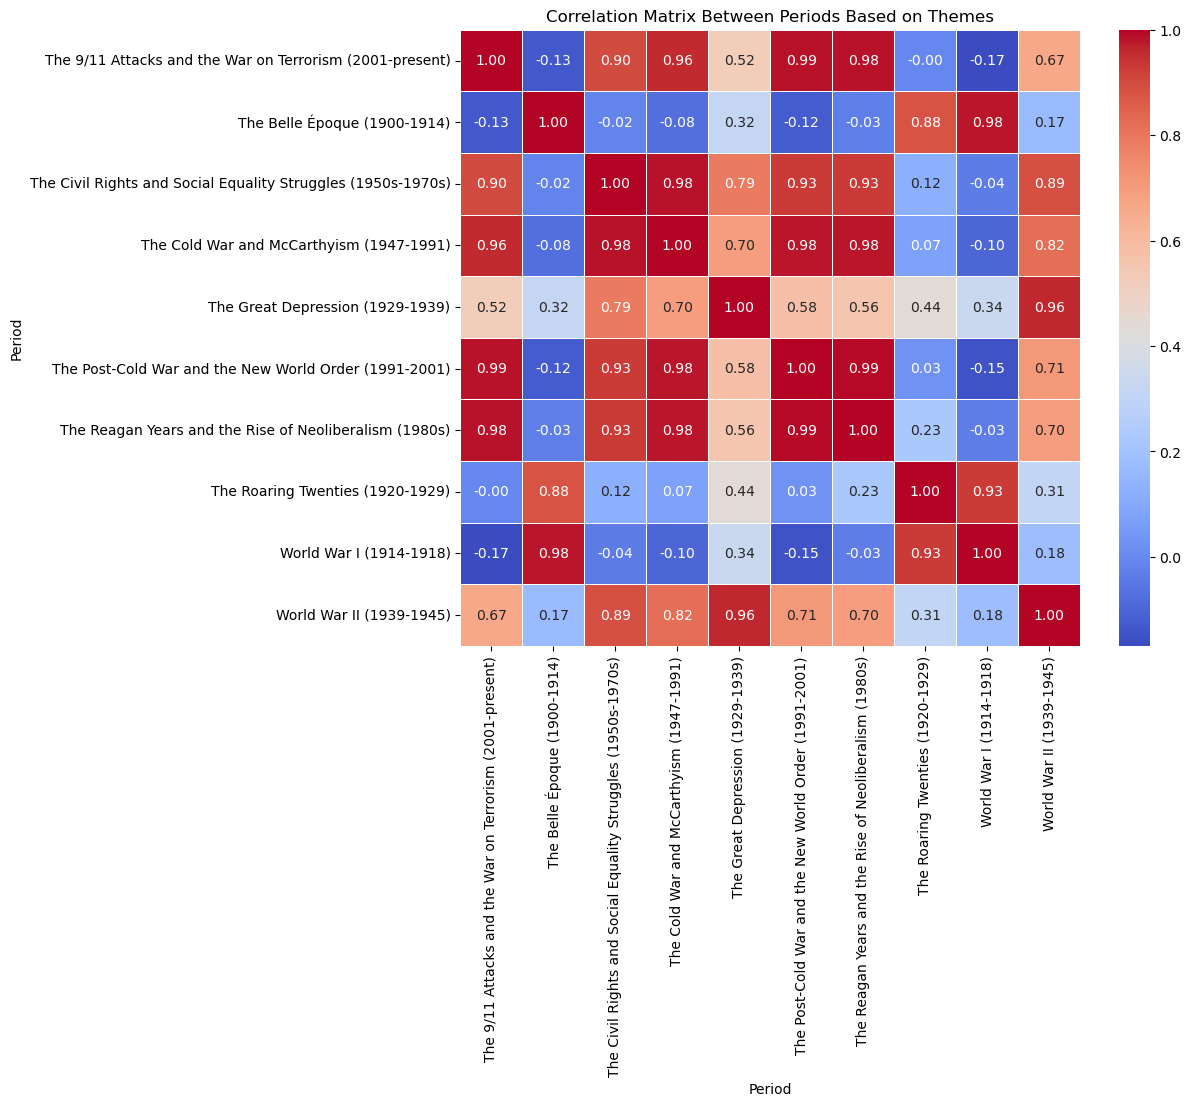

In [738]:
# Generate the count of movies per period and theme
periods_themes_counts = (
    movies_df_copy_exploded
    .groupby(['Periods', 'Themes'])
    .size()
    .reset_index(name='count')
)

# Pivot the table to get periods on both axes
periods_themes_pivot = periods_themes_counts.pivot_table(index='Themes', columns='Periods', values='count', aggfunc='sum')

# Calculate the correlation matrix between periods based on the themes
correlation_matrix = periods_themes_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Between Periods Based on Themes')
plt.xlabel('Period')
plt.ylabel('Period')
plt.show()


In [739]:
# Group by 'Themes' and apply to get the top 3 periods by count
top_periods_by_genre = periods_themes_counts.groupby('Themes').apply(
    lambda x: x[['Periods', 'count']].nlargest(3, 'count')
).reset_index(drop=False)

# Rename the index to 'level_1' to avoid confusion and ensure 'Themes' is a column
top_periods_by_genre.rename(columns={'level_1': 'Theme_Index'}, inplace=True)

print(top_periods_by_genre)

              Themes  Theme_Index  \
0   Action/Adventure           54   
1   Action/Adventure            0   
2   Action/Adventure           90   
3          Animation           55   
4          Animation            1   
5          Animation           37   
6    Black-and-White           74   
7    Black-and-White          144   
8    Black-and-White          127   
9             Comedy           57   
10            Comedy            3   
11            Comedy           93   
12             Crime           58   
13             Crime            4   
14             Crime           94   
15       Documentary            5   
16       Documentary           59   
17       Documentary           95   
18             Drama           60   
19             Drama            6   
20             Drama           96   
21        Historical            7   
22        Historical           61   
23        Historical           97   
24            Horror            8   
25            Horror           62   
2

/var/folders/tj/z0dp280955b2cclgs13c8ngm0000gn/T/ipykernel_34938/393318814.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



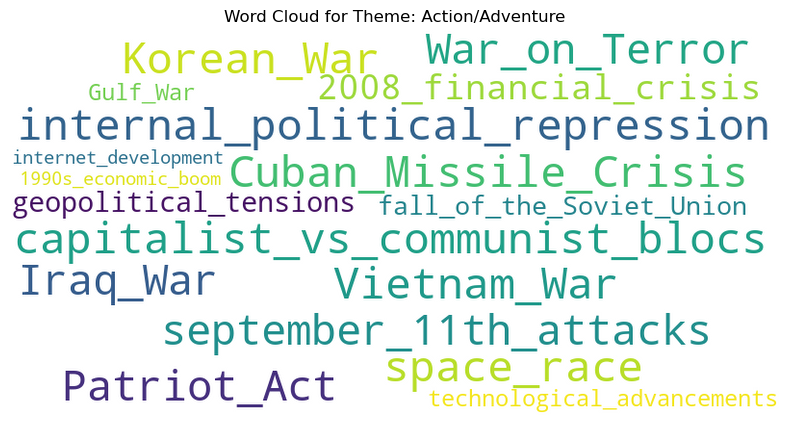

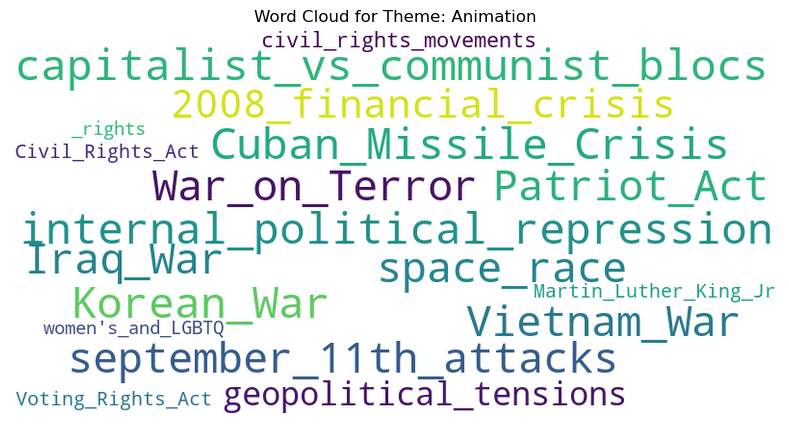

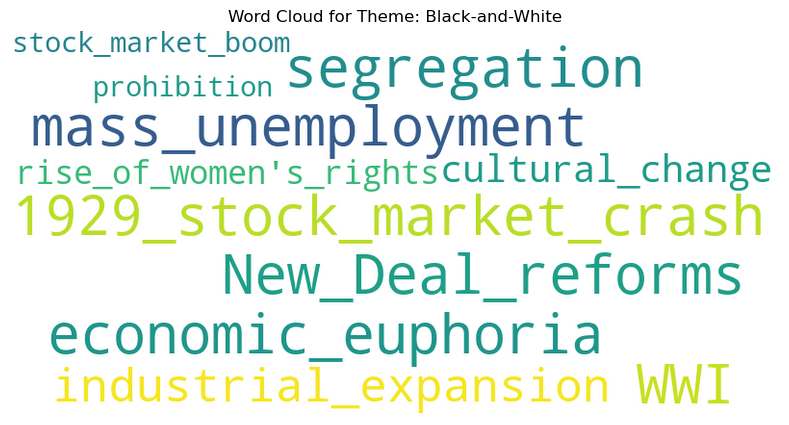

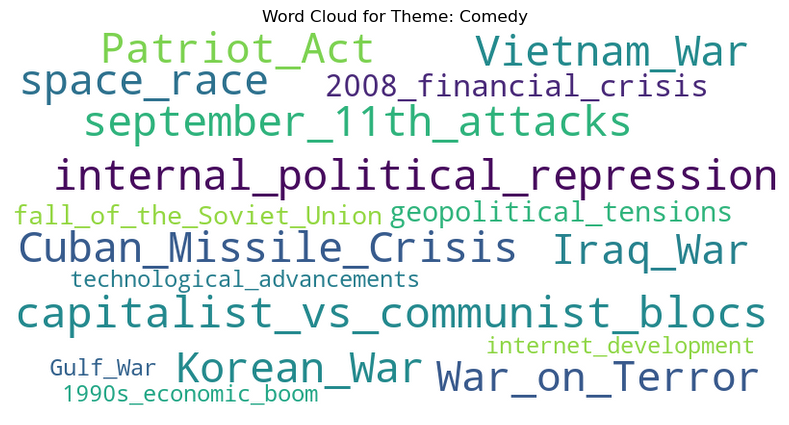

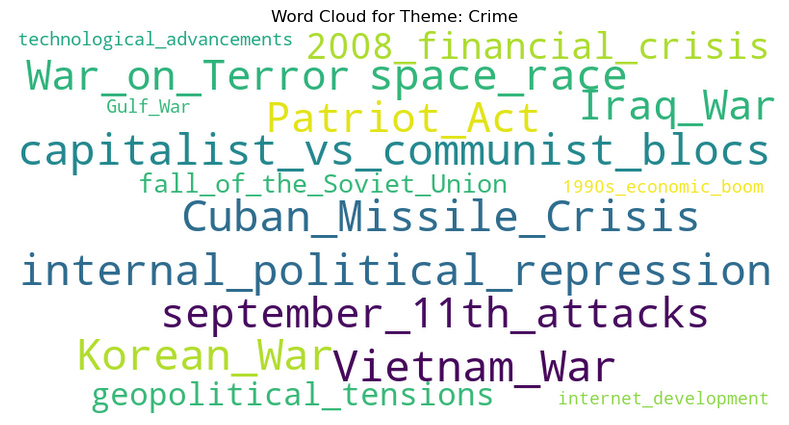

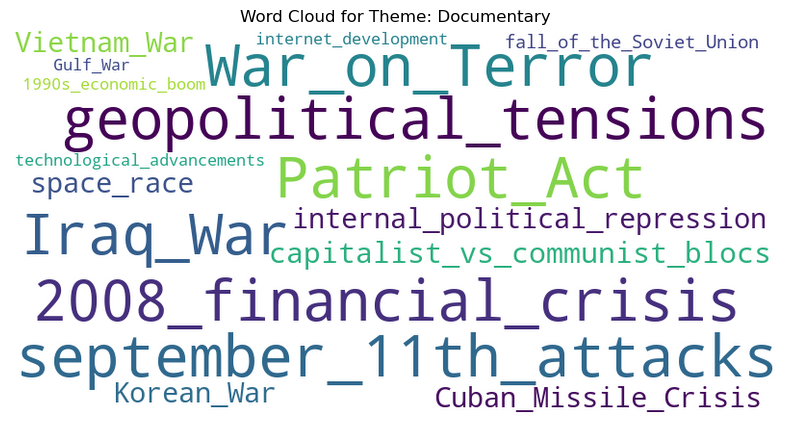

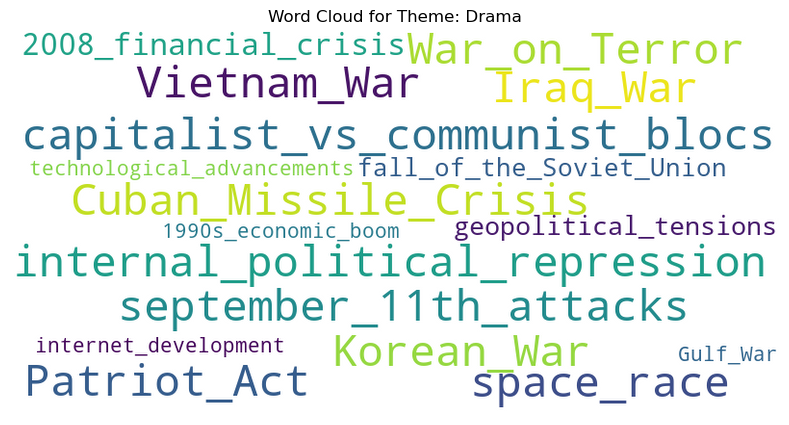

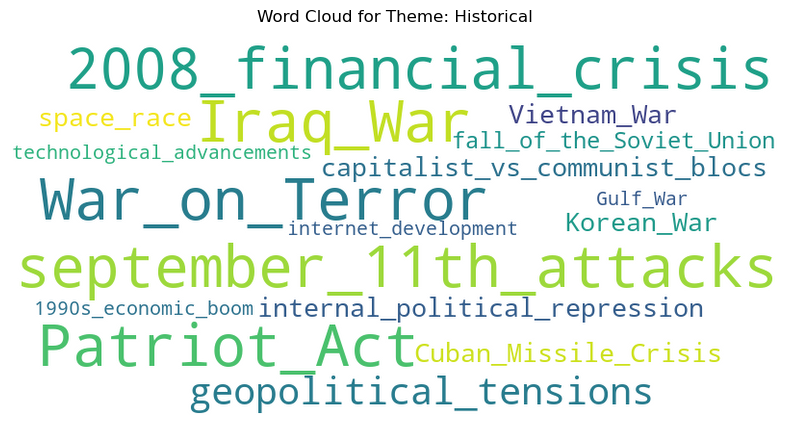

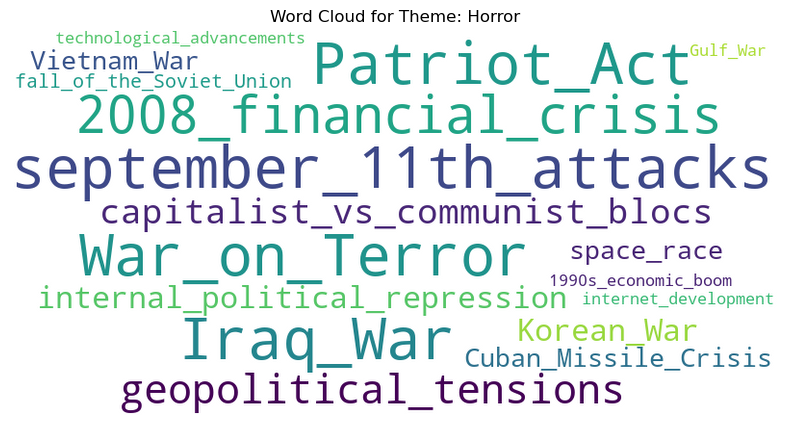

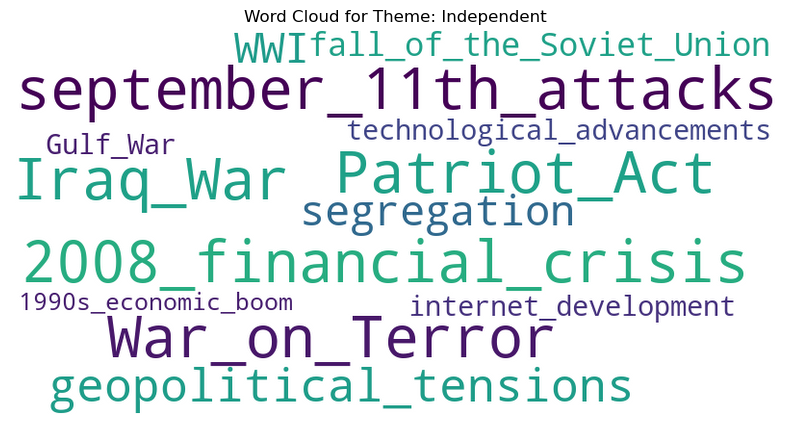

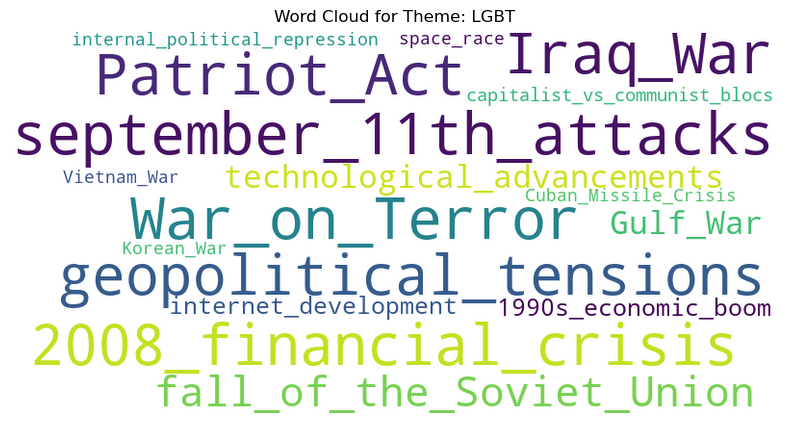

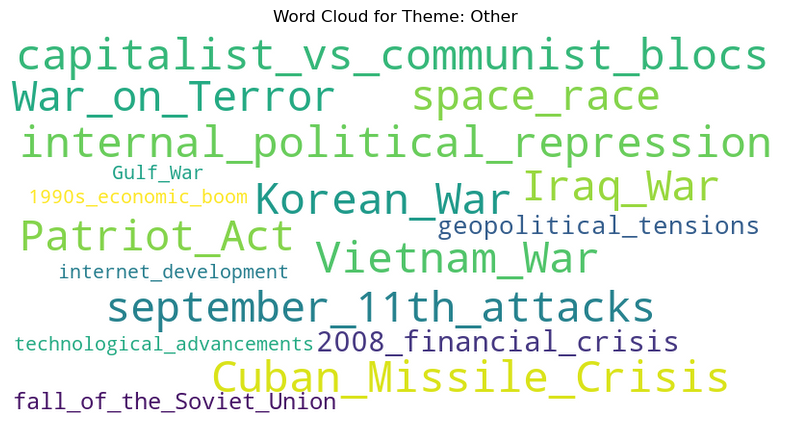

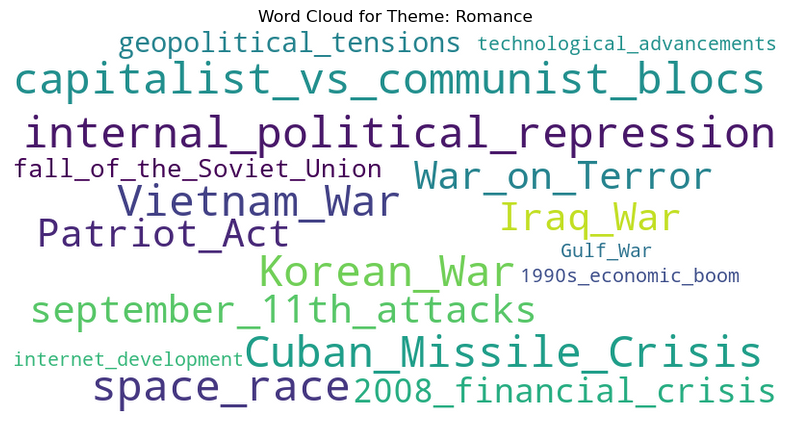

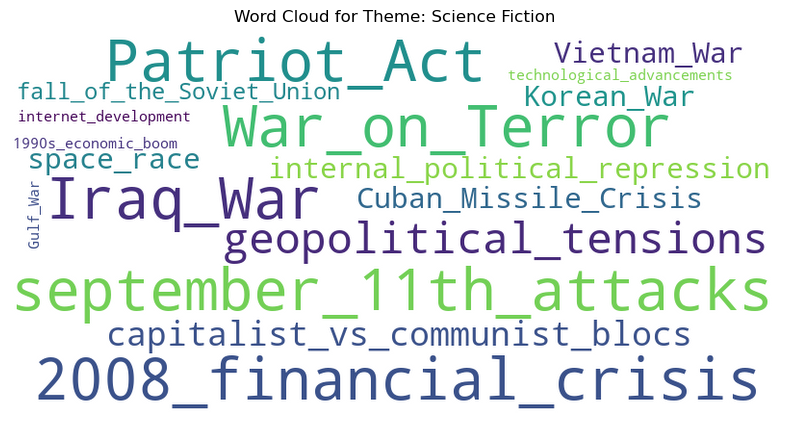

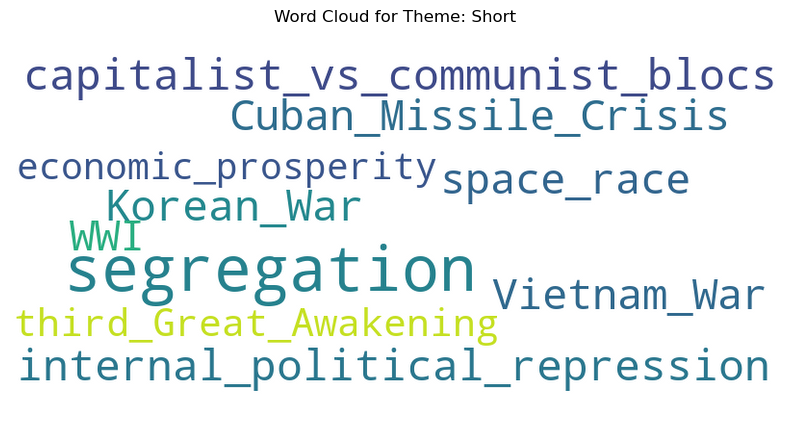

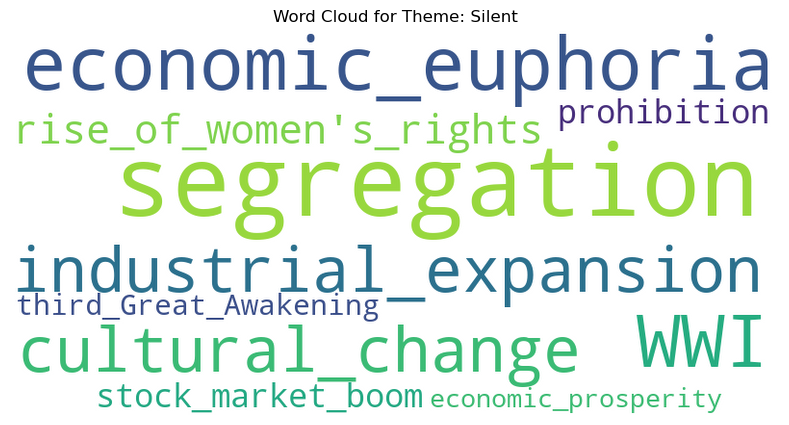

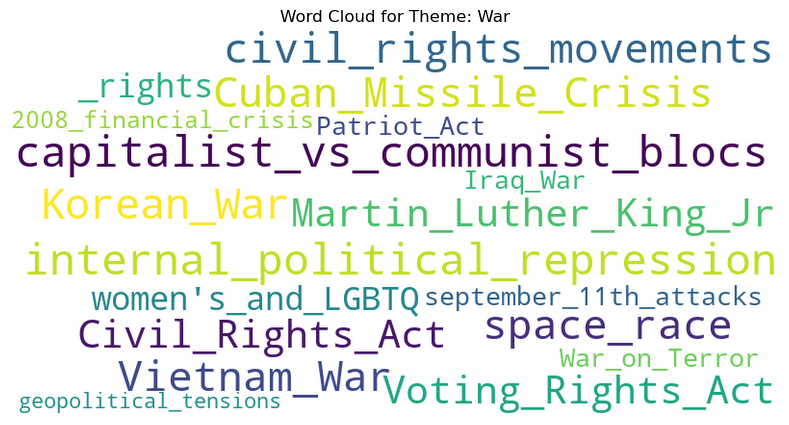

In [740]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Loop through each theme and create a wordcloud based on the top 3 periods' events
for theme in top_periods_by_genre['Themes'].unique():
    # Get the top 3 periods for the theme
    top_periods = top_periods_by_genre[top_periods_by_genre['Themes'] == theme]['Periods']
    
    # Collect all events for the top 3 periods, keeping each event as individual
    events = []
    for period in top_periods:
        events.extend(periods_events_map.get(period, [])) 
    
    events_text = ' '.join(events)
    
    # Generate the word cloud with events considered as individual strings
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        collocations=False  # Ensure no collocations
    ).generate(events_text)
    
    # Plot the word cloud
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='lanczos')
    plt.axis('off')
    plt.title(f"Word Cloud for Theme: {theme}")
    plt.show()


# Anoush

In [742]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33202 entries, 0 to 33201
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie name          33202 non-null  object
 1   Movie release date  33202 non-null  int64 
 2   Movie genres        33202 non-null  object
 3   Periods             33202 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [743]:
movies_df.describe()

Movie release date
count        33202.000000
mean          1973.988073
std             30.947831
min           1900.000000
25%           1946.000000
50%           1984.000000
75%           2002.000000
max           2016.000000

In [744]:
print("percentage of NaNs per columns")
movies_df.isna().mean() * 100

percentage of NaNs per columns


Movie name            0.0
Movie release date    0.0
Movie genres          0.0
Periods               0.0
dtype: float64

In [745]:
movies_df.sample(10)

Movie name  Movie release date  \
24366                                           Cerberus                2005   
31400                             The Wife Takes a Flyer                1942   
7769                                   Lord of the Flies                1990   
6606                                            The Nuer                1971   
18638                                             Charly                1968   
20150                              Flicka: Country Pride                2012   
20987  My Nappy Roots: A Journey Through Black Hair-i...                2005   
24596              Gary Larson's Tales from the Far Side                1994   
8053                                     Just Me and You                1989   
30930                              The Phantom Tollbooth                1970   

                                            Movie genres  \
24366  ['Fantasy', 'Science Fiction', 'Horror', 'Adve...   
31400  ['Romance Film', 'Comedy-drama', 'Comedy', 'Bl...   
7769   ['Adventure', 'Thriller', 'Drama', 'Psychologi...   
6606                                     ['Documentary']   
18638  ['Romantic drama', 'Science Fiction', 'Drama',...   
20150                           ['Family Film', 'Drama']   
20987               ['Culture & Society', 'Documentary']   
24596                                     ['Short Film']   
8053   ['Romantic comedy', 'Road movie', 'Romance Film']   
30930  ['Adventure', "Children's/Family", 'Animation'...   

                                                 Periods  
24366  [The 9/11 Attacks and the War on Terrorism (20...  
31400                         [World War II (1939-1945)]  
7769          [The Cold War and McCarthyism (1947-1991)]  
6606          [The Cold War and McCarthyism (1947-1991)]  
18638  [The Cold War and McCarthyism (1947-1991), The...  
20150  [The 9/11 Attacks and the War on Terrorism (20...  
20987  [The 9/11 Attacks and the War on Terrorism (20...  
24596  [The Post-Cold War and the New World Order (19...  
8053   [The Cold War and McCarthyism (1947-1991), The...  
30930  [The Cold War and McCarthyism (1947-1991), The...

<Axes: xlabel='genre', ylabel='count'>

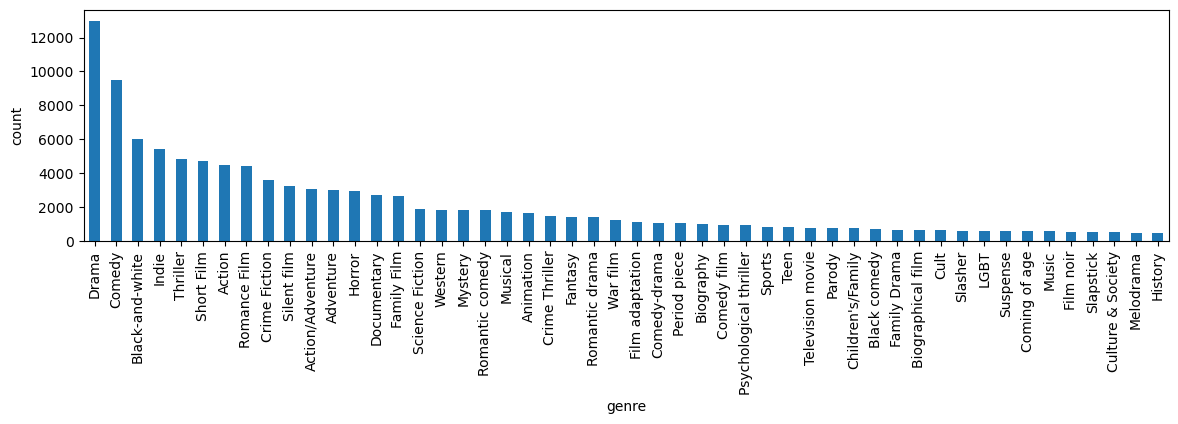

In [746]:
import ast

flattened = [genre for items in movies_df["Movie genres"] for genre in ast.literal_eval(items)]

genres = pd.Series(flattened).value_counts().head(50)  #.apply(get_genre)
plt.figure(figsize=(14,3))
plt.xlabel("genre")
plt.ylabel("count")
genres.plot(kind="bar")

<Axes: title={'center': 'Top 4 genre per year'}, xlabel='Movie release year'>

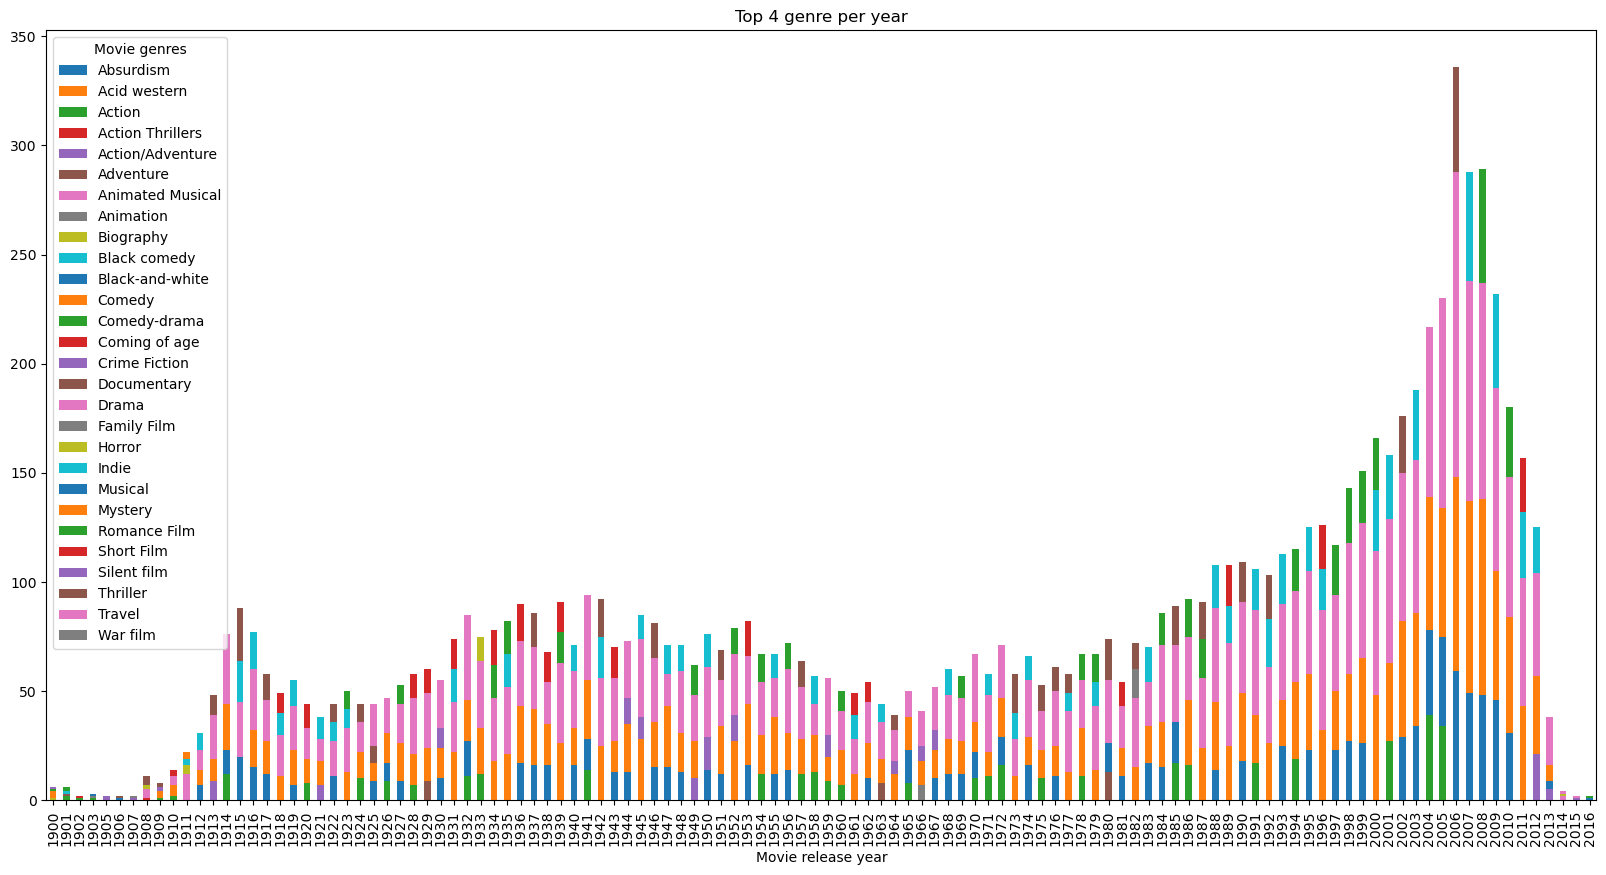

In [747]:
themes_counts_years = movies_df.copy(deep=True)
def get_year(string):
    try: return string.split("-")[0]
    except: return ""
themes_counts_years["Movie release year"] = themes_counts_years['Movie release date'].astype(int)
#genre_counts["Movie release date"].apply(get_year)

flattened = [genre for items in movies_df["Movie genres"] for genre in ast.literal_eval(items)]
genres = pd.Series(flattened)

themes_counts_years["Movie genres"] = genres

themes_counts_years = themes_counts_years.groupby(["Movie release year", "Movie genres"]).size().unstack(fill_value=0)

themes_counts_years.apply(lambda x: x.nlargest(4), axis=1).plot(kind="bar", stacked=True, figsize=(20, 10),
                                                         title="Top 4 genre per year")
#plt.xlim(1910,2011)

<Axes: title={'center': 'Normalized genre distribution per year'}, xlabel='Movie release year'>

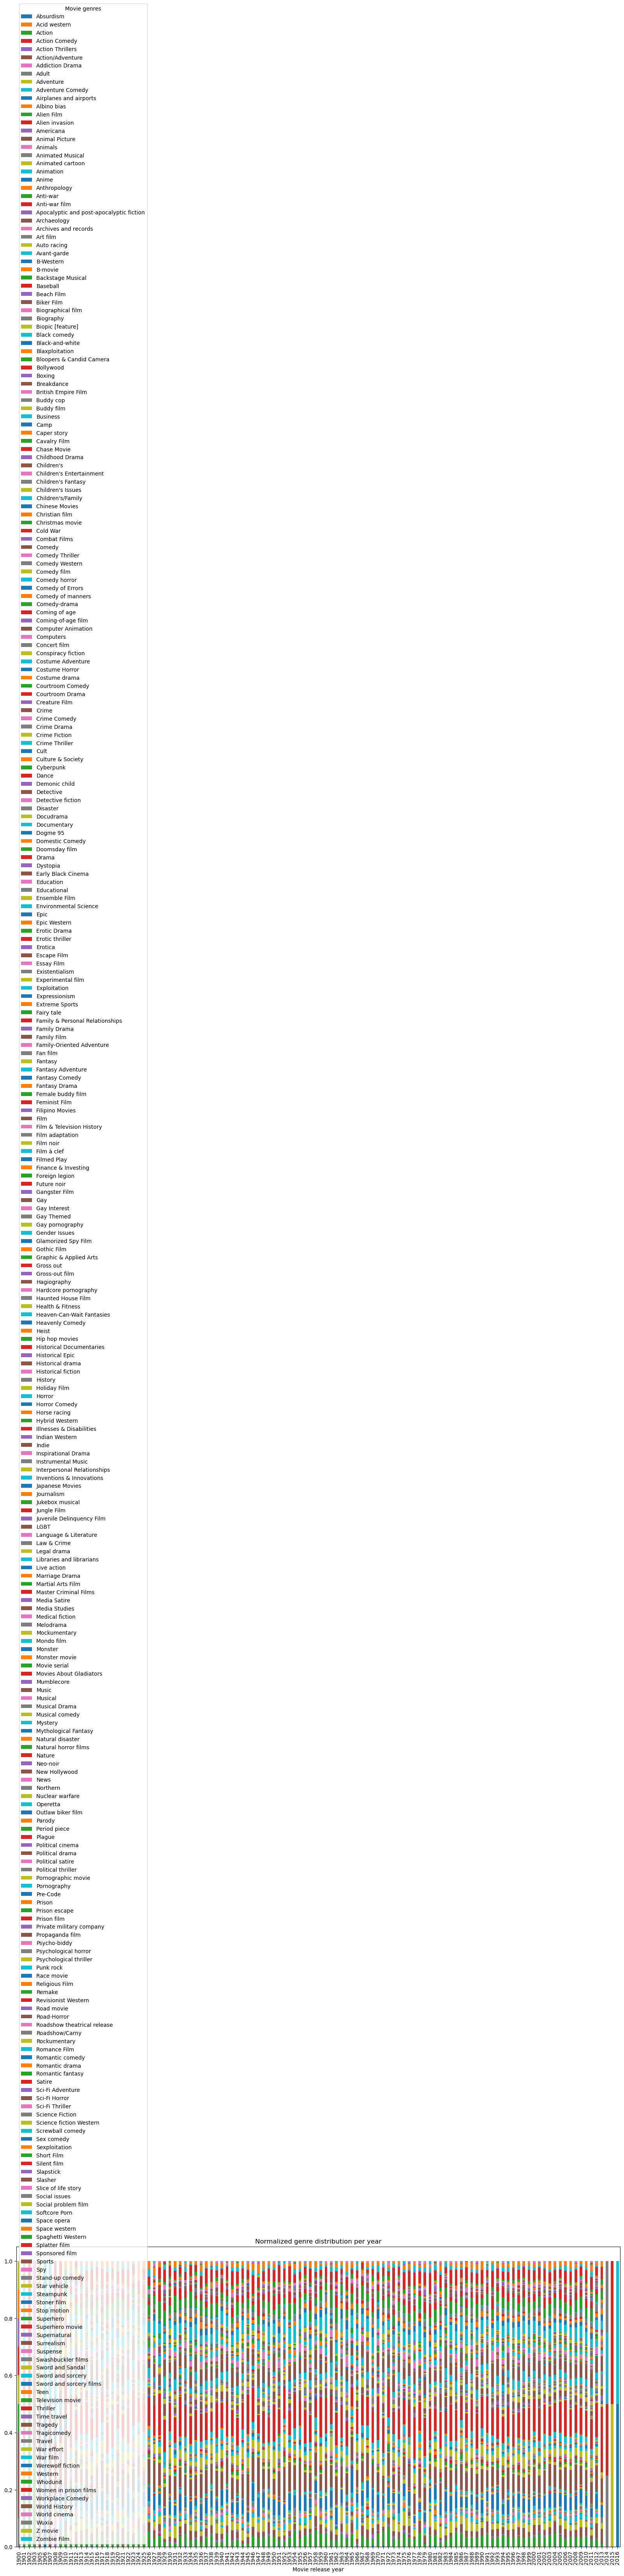

In [748]:
themes_counts_years.div(themes_counts_years.sum(axis=1), axis=0).plot(kind="bar", stacked=True, figsize=(20, 10),title="Normalized genre distribution per year")

In [749]:
flattened = [genre for items in movies_df["Movie countries"] for genre in ast.literal_eval(items)]
countries = pd.Series(flattened).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("country")
plt.ylabel("log count")
plt.yscale("log")
countries.plot(kind="bar")

KeyError: 'Movie countries'

<Axes: xlabel='language', ylabel='log count'>

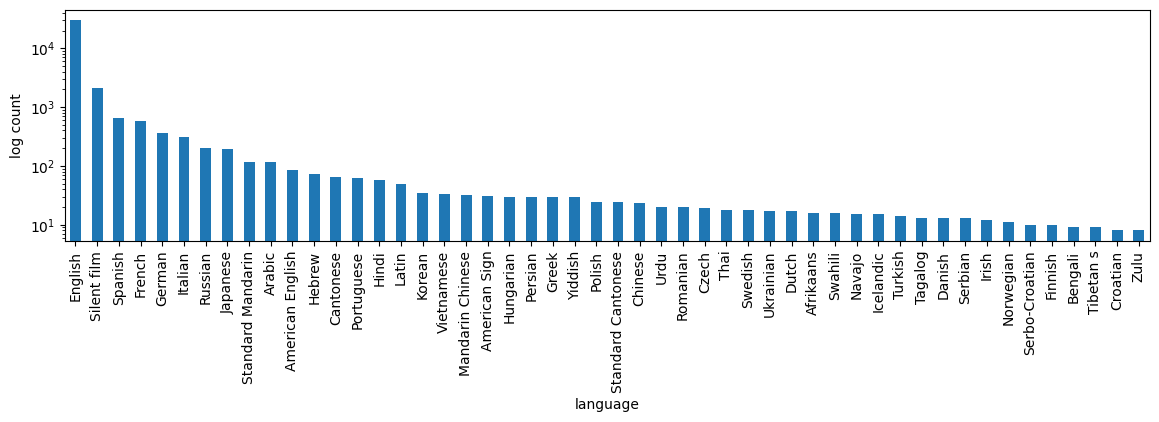

In [ ]:
flattened = [genre.replace("Language", "").replace("language", "").strip() for items in movies_df["Movie languages"] for genre in ast.literal_eval(items)]
languages = pd.Series(flattened).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("language")
plt.ylabel("log count")
plt.yscale("log")
languages.plot(kind="bar")

<Axes: title={'center': 'Movie box office revenue distribution'}, xlabel='Movie box office revenue', ylabel='frequency'>

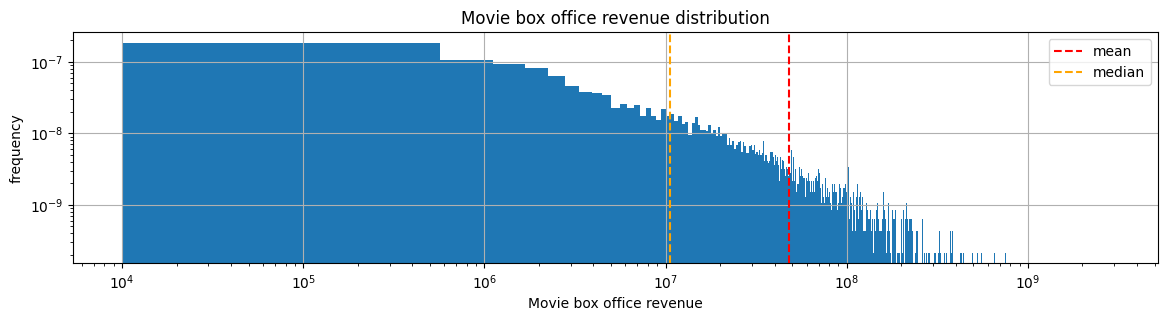

In [ ]:
movies_df_unprocessed = pd.read_csv("data/movie.metadata.tsv", sep="\t", header=None)
movies_df_unprocessed.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]


plt.figure(figsize=(14,3))
plt.title("Movie box office revenue distribution")
plt.xlabel("Movie box office revenue")
plt.ylabel("frequency")
#plt.xlim(0, 100000000)
plt.xscale("log")
plt.yscale("log")
plt.axvline(movies_df_unprocessed["Movie box office revenue"].mean(), color="red", label="mean", linestyle="--")
plt.axvline(movies_df_unprocessed["Movie box office revenue"].median(), color="orange", label="median", linestyle="--")
plt.legend()
movies_df_unprocessed["Movie box office revenue"].hist(density=True, bins=5000)

In [ ]:
print("Top 50 films with the highest movie box office revenue")
movies_df_unprocessed.sort_values(ascending=False, by="Movie box office revenue")[["Movie name", "Movie release date", "Movie box office revenue"]].head(50)

Top 50 films with the highest movie box office revenue


Movie name Movie release date  \
23702                                             Avatar         2009-12-10   
22256                                            Titanic         1997-11-01   
28192                                       The Avengers         2012-04-11   
30278      Harry Potter and the Deathly Hallows – Part 2         2011-07-07   
18645                     Transformers: Dark of the Moon         2011-06-23   
80920      The Lord of the Rings: The Return of the King         2003-12-17   
54719                              The Dark Knight Rises         2012-07-16   
69586                                        Toy Story 3         2010-06-12   
14303        Pirates of the Caribbean: On Stranger Tides         2011-05-07   
50039            Star Wars Episode I: The Phantom Menace         1999-05-19   
9719                                 Alice in Wonderland         2010-03-05   
38158                                    The Dark Knight         2008-07-16   
71442           Harry Potter and the Philosopher's Stone         2001-11-16   
73532           Pirates of the Caribbean: At World's End         2007-05-19   
59574       Harry Potter and the Deathly Hallows: Part I         2010-11-17   
21432                                      The Lion King         1994-06-15   
17924          Harry Potter and the Order of the Phoenix         2007-06-28   
7358              Harry Potter and the Half-Blood Prince         2009-07-06   
8821               The Lord of the Rings: The Two Towers         2002-12-05   
13479                                       Finding Nemo         2003-05-30   
59393                                            Shrek 2         2004-05-15   
63097                                      Jurassic Park         1993-06-09   
10820                Harry Potter and the Goblet of Fire         2005-11-06   
32539                                       Spider-Man 3         2007-04-16   
38443                     Ice Age: Dawn of the Dinosaurs         2009-07-01   
41200            Harry Potter and the Chamber of Secrets         2002-11-03   
79973  The Lord of the Rings: The Fellowship of the Ring         2001-12-10   
63889                         Ice Age: Continental Drift         2012-07-13   
62303         Star Wars Episode III: Revenge of the Sith         2005-05-15   
24339                Transformers: Revenge of the Fallen         2009-06-19   
60260                                          Inception         2010-07-08   
3035                                          Spider-Man         2002-05-03   
78261                                   Independence Day         1996-06-25   
41589                                    Shrek the Third         2007-05-06   
41251           Harry Potter and the Prisoner of Azkaban         2004-06-04   
57552                         E.T. the Extra-Terrestrial         1982-05-26   
33405  Indiana Jones and the Kingdom of the Crystal S...         2008-05-22   
14453                                       Spider-Man 2         2004-06-25   
80800                   Star Wars Episode IV: A New Hope         1977-05-25   
53055                                               2012         2009-11-11   
23863                                  The Da Vinci Code         2006-05-17   
49438                                Shrek Forever After         2010-04-21   
63446                             The Amazing Spider-Man         2012-06-13   
35156                                The Matrix Reloaded         2003-05-07   
65511                                                 Up         2009-05-13   
15249                 Madagascar 3: Europe's Most Wanted         2012-05-18   
62829                                           New Moon         2009-11-16   
49114                                       Transformers         2007-06-12   
9912           The Twilight Saga: Breaking Dawn - Part 1         2011-11-16   
40199                                            Eclipse         2010-06-24   

       Movie box